# PHASE 4 FINAL PROJECT

## 1. BUSINESS UNDERSTANDING

### 1.1 INTRODUCTION

Creating recommendation systems is a famous problem in our society, such is the importance of such a problem that Netflix, a streaming service, once offered $1 Million as a prize to anyone who could beat their own recommendation systems by 10%. This prize was won in 2009 by a team of researchers called `Belker's Pragmatic Chaos` in 2009 after 3 years of competition. Netflix has also said that they would lose over a billion dollars each year in revenue if it wasn't for their recommendation system.

Knowing this, a startup company in Kenya called Phoenix Incorporated has decided to start its own streaming service to compete with the likes of Showmax, Netflix and Prime Video which are all available in Kenya. The idea of Phoenix as a startup company is to offer the same variety as a company like Netflix but at a lower price so as to accessible by the average Kenyan in this economy. Phoenix Incorporated understands that in order for a streaming service to be successful it has to have a good recommendation system so as to keep its clients happy and to attract new clients hence more revenue. In order to this, they have decided to hire a famous Data science firm called Regex Analytics to assist them in this task.

After meeting with one of the representatives from Phoenix Incorporated the CEO of Regex Analytics has decided to give this task to the head Data Scientist in the firm. The head has then decided to delegate this task to one of the experienced data scientists in his team. This experienced data scientist is to build a recommendation system that recommends 5 movies that users may like based on previous choices and what others liked from the streaming platform so as to address the cold start problem. The experienced data scientist is then supposed to present this model to the head data scientist who will then show it to the CEO. He is also to create a presentation on the project mentioned above as a summary of his findings to a non-technical audience which will also include some members from Phoenix Incorporated.

### 1.2 OBJECTIVES

- To build a recommendation system capable of suggesting 5 movies to users based on their past choices and popular content in the streaming service currently.

- To address the `cold start problem` to provide valuable recommendations to new users with limited interaction history.

- To optimise recommendation algorithms to maximise user satisfaction and platform revenue.

- To implement recommendation system to enhance user engagement and retention.

### 1.3 PROBLEM STATEMENT

To build a recommendation system that offers 5 recommendations to a user based on previous content and also what other users with similar interests have watched.

### 1.4 MEASURE OF SUCCESS

The goal is to build a recommendation system that recommends 5 movies to a user based on previous things watched and what other users with similar interests have watched. The measure of success will therefore be a working recommendation system that is able to offer recommendations to new and old users with at least 0.5 RMSE. This is a good starting point. The model can them be improved later based on suggestion from users as Netflix even as a company has been around for more than 10 years, hence it has had time to improve its recommendation systems to almost perfect.

## 2. DATA UNDERSTANDING

### 2.0 General Statement

In order to build a recommendation system the data sourced was from the `MovieLens` dataset. This is a common dataset used in making recommendation systems. This dataset consists of various csv files which each shall be explained below.

First loading libraries to see the columns for each csv file in form of a dataframe and also the libraries we might use later on.

In [2]:
# For analysis and data manipulation
import pandas as pd
import numpy as np

# Surprise module and methods for the recommendation system
from surprise import Dataset, Reader
from surprise import SVD as SVD1  # Basic version of SVD
from surprise.prediction_algorithms import SVD as SVD2   # More advanced version of SVD for fine tuning the model
from surprise import KNNBasic
from surprise import NMF
from surprise.model_selection import train_test_split
from surprise import accuracy

# For fine tuning the model
from surprise.model_selection import GridSearchCV

# For visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Spectral")  # Setting style for plots
sns.set_style("darkgrid")
%matplotlib inline


### 2.1 Ratings

These are the ratings given to various movies and the data contained can be seen below.

In [3]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**As can be seen above the columns for ratings are `userId`, `movieId`, `rating` and `timestamp`.**

 These are defined as follows:
 - **UserId** : The unique identification of the user who gave the rating for a specific movie to help know ratings given by a user or other users.
 
 - **movieId** : The unique identification of the movie of which the user gave a rating to help know the ratings given to movies to be able to recommend correctly if a user is new to the system based on ratings of users with similar interests.

 - **rating** : The rating given by a user to a specific movie starting from 0 to 5 which is the highest score. This is to help in content and collaborative filtering.

 - **timestamp** :  This represents the date and time the user rated a movie in terms of seconds.


### 2.2 Movies

These are the IDs of the movies to be rated, the titles of the movies in question and the category in which each film belongs.

In [4]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**The columns of the movie dataframe are `movieId`, `title` and `genres`.**

These are defined as follows:
- **movieId** : Same as above unique identification of movie to be rated.

- **title** : Title of the movie to be rated used to tie the movieId to a string so that the system can know the name of a specific movieId

- **genres** : The category or the type of the film rated.

### 2.3 Links

This table contains ID data for various databases and also for the MovieLens site. This is most likely a junction table used to connect various dataframes through common columns.

In [5]:
links = pd.read_csv('links.csv')
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


**The columns are `movieId`, `imdbId` and `tmdbId`.**

They are defined as follows:

- **movieId** : Unique identifier for every movie according to the MovieLens site.

- **imdbId** : Unique identifier for every movie according to the International movie database(IMDb)

- **tmdbId** : Unique identifier for every movie according to The Movie DataBase(TMDb)

### 2.4 Tags

Contains the IDs of the movie and the users. It also contains the tags given by the user and the timestamp the user gave that tag.

In [6]:
tags = pd.read_csv('tags.csv')
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


**These are the columns present `userId`, `movieId`, `tag` and `timestamp`.**

They are defined as follows:

- **userId** : Unique identifier of user who gave a tag of a movie.

- **movieId** : Unique identifier of movie given a tag.

- **tag** : Short description of a movie given by a user to express opinions. They are used by recommendation systems to understand user preferences and make movie recommendations based on the tags assigned by users. It will therefore be useful in building a recommendation system.

- **timestamp** : The time in seconds a tag was made by a user.


**These are the columns present in all the dataframes and even though we may drop some the remaining ones will be useful in building a recommendation system in their own way. Now we move on to the Data Preparation phase of the project.**

## 3. DATA PREPARATION

### 3.1 Combining dataframes using common key

We want to make our dataframe ready for analysis by removing `outliers`, `wrong datatypes`, `duplicates` and `missing values` from the dataset. We may also do some feature engineering and feature selection in the process to help us understand our data more.

The first step to make our work easier is to combine all the dataframes into one using the common key `movieId`. This is to lighten our workload.

In [7]:
# Merging all the dataframes based on their common column movieId
combined_df = movies.merge(ratings, on='movieId').merge(links, on='movieId').merge(tags, on='movieId')

# Results
combined_df.head()

,movieId,title,genres,userId_x,rating,timestamp_x,imdbId,tmdbId,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,474,pixar,1137206825


**We have succesfully loaded the dataframes and joined them using the common column `movieId` for the join. We did not specify the how parameter,hence as a default parameter the join was set to `inner`. This is because we wanted rows where there was a key on both the left and right tables so as to avoid `NaN` values in the new dataframe.**

### 3.2 Missing values

We want to see if there are any missing values in our dataset to do this we will create a function called `missing_pecentage` that checks the percentage of missing values from each column in the dataframe.

In [8]:
def missing_percentage(df):
    """
    Calculate the percentage of missing values for each column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A DataFrame showing the percentage of missing values
                      and data types for each column.
    """

    # Dictionary for storing the percentage of missing values
    missing_values_percentage = {}

    # Loop for calculating the percentage of missing values and putting values in the dictionary
    for column in df.columns:
        missing_values_percentage[column] = (df[column].isnull().sum() / len(df[column])) * 100

    # Creating a DataFrame from the dictionary
    missing_df = pd.Series(missing_values_percentage)
    missing_df = pd.DataFrame(missing_df, columns=['Percentage Missing'])

    # Creating a new column for the data type of the column with missing values
    missing_df['dtype'] = [df[column].dtypes for column in missing_df.index]

    return missing_df

Testing out our new function

In [9]:
missing_percentage(combined_df)

,Percentage Missing,dtype
movieId,0.0,int64
title,0.0,object
genres,0.0,object
userId_x,0.0,int64
rating,0.0,float64
timestamp_x,0.0,int64
imdbId,0.0,int64
tmdbId,0.0,float64
userId_y,0.0,int64
tag,0.0,object


**There are no missing values in any of the columns present as percent missing is zero for all of them also, the `dtypes` seem to be varied as there are a combination of integers, floats and objects meaning strings in this combined dataframe.**

### 3.3 Checking for duplicates

In [10]:
combined_df.duplicated().sum()

0

**There are no duplicates in this dataset.**

### 3.4 Creating a new year column from the title column of the dataframe.

Looking at the combined dataset above it is interesting to see that at the end of every string in the `title` column is the year when the movie came out what if we could seperate each year from the title column to be its own column `year`. This we will do using a function known as `year_splitter` as shown below.

In [11]:
# Creating a copy to test the function to be created
test_df = combined_df.copy()

def year_splitter(df):
    """
    Splits the movie into individual words, isolates the years into their own column,
    combines the words again, removes the years value, then the list created when splitting into individual words.

    :param df: DataFrame containing a 'title' column with movie titles.
    :return: DataFrame with 'title' column modified.
    """
    # Splitting the titles into individual words
    df['title'] = df['title'].apply(lambda x: x.split())

    # Extracting the years
    df['year'] = [x[-1].strip('()') for x in df['title']]

    # Joining the separate strings into one, removing the years
    df['title'] = [[' '.join(inner_list[:-1])] for inner_list in df['title']]

    # Removing the list from the 'title' column
    strings = []
    for value in df['title']:
        for string in value:
            strings.append(string)
    
    # Assigining results to the title column
    df['title'] = strings

    # Returning the modified DataFrame
    return df




Testing the function to see if it worked

In [12]:
# Creating a new dataframe based on the changes to the test df.
new_df = year_splitter(test_df)
new_df


,movieId,title,genres,userId_x,rating,timestamp_x,imdbId,tmdbId,userId_y,tag,timestamp_y,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,336,pixar,1139045764,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,474,pixar,1137206825,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,567,fun,1525286013,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,336,pixar,1139045764,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,474,pixar,1137206825,1995
...,...,...,...,...,...,...,...,...,...,...,...,...
233208,187595,Solo: A Star Wars Story,Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,3778644,348350.0,62,star wars,1528934552,2018
233209,193565,Gintama: The Movie,Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,1636780,71172.0,184,anime,1537098582,2010
233210,193565,Gintama: The Movie,Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,1636780,71172.0,184,comedy,1537098587,2010
233211,193565,Gintama: The Movie,Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,1636780,71172.0,184,gintama,1537098603,2010


**The function worked and now we have a new `year` column with the years removed from the `title` column.**

From now on we will be using the `new_df` dataframe.

We wanted to convert the new `years` column into integers but there are weird values such as `Patterson` as shown below. We therefore need to drop them.

In [13]:
new_df['year'][new_df['year'] == 'Paterson']

232424    Paterson
232425    Paterson
232426    Paterson
Name: year, dtype: object

In [14]:
new_df = new_df.drop(new_df[new_df['year'] == 'Paterson'].index)

Seeing if it worked.

In [15]:
new_df['year'][new_df['year'] == 'Paterson']

Series([], Name: year, dtype: object)

**Since it worked we now convert the years column to integers.**

In [16]:
new_df['year'] = new_df['year'].apply(lambda x: int(x))

Seeing if it worked by taking a sample

In [17]:
type(new_df['year'][6000])

numpy.int64

**It worked we now have a new year column in terms of integers that we will use in our Exploratory Data Analysis.**

### 3.5 Checking for wrong datatypes.

The next thing we want to check in our combined dataframe is wrong datatypes. This is where for example there is a string in a column of integers or a boolean in a column that is supposed to contain strings only. In order to do this we will first create function called `wrong_data` to aid us in our course as shown below.

In [18]:
def wrong_data(df):
    """
    Identify columns with values of the wrong data type in a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        dict: A dictionary mapping column names to values with incorrect data types.
    """

    # Dictionary for mapping data types
    value_types = {
        'int64': int,
        'object': str,
        'float64': float
    }

    # Dictionary for mapping columns with wrong data types
    wrong_data_types = {}

    # Loop through columns to check for incorrect data types
    for column in df.columns:
        wrong_data_types[column] = [x for x in df[column] if type(x) != value_types[str(df[column].dtypes)]]

    # Final results
    return wrong_data_types

Now testing our function on the new combined dataframe.

In [19]:
wrong_data(combined_df)

{'movieId': [],
 'title': [],
 'genres': [],
 'userId_x': [],
 'rating': [],
 'timestamp_x': [],
 'imdbId': [],
 'tmdbId': [],
 'userId_y': [],
 'tag': [],
 'timestamp_y': []}

**None of the columns have any wrong datatypes.**

### 3.6 Checking for outliers

As a reminder here is a look of our dataframe.

In [20]:
combined_df.head()

,movieId,title,genres,userId_x,rating,timestamp_x,imdbId,tmdbId,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,474,pixar,1137206825


**Looking at our dataframe the numeric values are those with unique identifiers such as `userId`, `movieId`, `imdbId` and `tmdbId`. These contain unique identifiers for each movie and user hence it would not be wise to remove outliers from them. The `timestamp` columns show the time a person made a rating or a tag hence outliers are most likely to happen. It is for these reasons, why we will not remove outliers from our dataframe.**

### 3.7 Feature engineering

We want to convert both the `timestamp` columns from seconds into a more standard time format which can easily be understood for analysis purposes and possibly modelling. To do this we will first rename both timestamps and other columns to something that is easier to understand. Before we do this however we will use create new names for all the columns into something more understandable. First is creating a list of new names to rename, then assigning these names to our dataframe. We will also change the position of some of the columns so that the data is more understandable.

In [21]:
# Assigining new names to the columns
new_names = ['Movie_Id', 'Title', 'Genres', 'rating_user_id', 'Rating', 'rating_timestamp', 'IMDB_id', 'TMDB_id', 'tag_user_id', 'Tag', 'tag_timestamp', 'Year']

# Renaming our columns to these new names
new_df.columns = new_names

# Seeing our results
new_df.head()

,Movie_Id,Title,Genres,rating_user_id,Rating,rating_timestamp,IMDB_id,TMDB_id,tag_user_id,Tag,tag_timestamp,Year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,336,pixar,1139045764,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,474,pixar,1137206825,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,567,fun,1525286013,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,336,pixar,1139045764,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,474,pixar,1137206825,1995


**Now our columns have new names which are more understandable than the previous ones of x and y which were a bit ambiguous and hard to understand. We have also changed some names to start from lowercase to uppercase for uniformity purposes.**

Changing the `Year` column to `year_movie_released` to know its referring to the year the movie was released

In [22]:
# Changing name
new_df.rename(columns={'Year': 'year_movie_released'}, inplace=True)

# Seeing results
new_df.head()

,Movie_Id,Title,Genres,rating_user_id,Rating,rating_timestamp,IMDB_id,TMDB_id,tag_user_id,Tag,tag_timestamp,year_movie_released
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,336,pixar,1139045764,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,474,pixar,1137206825,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,567,fun,1525286013,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,336,pixar,1139045764,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,474,pixar,1137206825,1995


We also want to change the newly named column to be next to the `Title` column so that people can know the year the movie released relates to the title of the movie. To do this we will create a function called `column_mover` to move our columns as it is possible several will be moved before we reach EDA

In [23]:
# Creating a copy to test the function
copy_df = new_df.copy()

def column_mover(df, new_position, column_name):
    """
    Move a specific column to a new position in a DataFrame.

    Parameters:
        df (DataFrame): The DataFrame containing the column.
        new_position (int): The index where the column should be moved to.
        column_name (str): The name of the column to move.

    Returns:
        DataFrame: The DataFrame with the column moved to the new position.
    """
    # Extract the column to move
    column_to_move = df.pop(column_name)

    # Insert the column at the new position
    df.insert(new_position, column_name, column_to_move)

    return df


# Testing our function and seeing the results
copy_df = column_mover(copy_df, 2, 'year_movie_released')
copy_df.head()


,Movie_Id,Title,year_movie_released,Genres,rating_user_id,Rating,rating_timestamp,IMDB_id,TMDB_id,tag_user_id,Tag,tag_timestamp
0,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,336,pixar,1139045764
1,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,474,pixar,1137206825
2,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,567,fun,1525286013
3,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,336,pixar,1139045764
4,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,474,pixar,1137206825


**Since the function worked we can now apply to our original dataframe `new_df`.**

In [24]:
# Extracting column to remove
new_df = column_mover(new_df, 2, 'year_movie_released')

new_df.head()

,Movie_Id,Title,year_movie_released,Genres,rating_user_id,Rating,rating_timestamp,IMDB_id,TMDB_id,tag_user_id,Tag,tag_timestamp
0,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,336,pixar,1139045764
1,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,474,pixar,1137206825
2,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,567,fun,1525286013
3,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,336,pixar,1139045764
4,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,474,pixar,1137206825


**The column has been moved successfully.**

Now we want to do feature engineering to the `rating_timestamp` and the `tag_timestamp` from seconds to something more understandable for easier analysis and to make it easier for our model to understand. We will also create new columns called `rating_year` and `tag_year` to show the year the ratings and tags were made.

In [25]:
# Converting 'rating_timestamp' column to a datetime object and extracting the year from the timestamps to create a new column rating_year
new_df['rating_year'] = pd.to_datetime(new_df['rating_timestamp'], unit='s').dt.year

# Then the 'tag_timestamp' column
new_df['tag_year'] = pd.to_datetime(new_df['tag_timestamp'], unit='s').dt.year

# Seeing results
new_df.head()

,Movie_Id,Title,year_movie_released,Genres,rating_user_id,Rating,rating_timestamp,IMDB_id,TMDB_id,tag_user_id,Tag,tag_timestamp,rating_year,tag_year
0,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,336,pixar,1139045764,2000,2006
1,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,474,pixar,1137206825,2000,2006
2,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,567,fun,1525286013,2000,2018
3,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,336,pixar,1139045764,1996,2006
4,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,474,pixar,1137206825,1996,2006


*`New columns rating_year and tag_year have been created.`*

Moving the position of `rating_year` to be next to `rating_timestamp`.

In [26]:
# Assigning new variable to the function
new_df = column_mover(new_df, 7, 'rating_year')

# Seeing head to see if it worked
new_df.head()

,Movie_Id,Title,year_movie_released,Genres,rating_user_id,Rating,rating_timestamp,rating_year,IMDB_id,TMDB_id,tag_user_id,Tag,tag_timestamp,tag_year
0,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,2000,114709,862.0,336,pixar,1139045764,2006
1,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,2000,114709,862.0,474,pixar,1137206825,2006
2,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,2000,114709,862.0,567,fun,1525286013,2018
3,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1996,114709,862.0,336,pixar,1139045764,2006
4,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1996,114709,862.0,474,pixar,1137206825,2006


**Now that we have the year each user made a review and or a tag at the right positions we can even model a time series which shows the average rating given to movies over the years.**

We also want to create a new column `Movie_age` which shows the age of the movie at the time of rating or tagging to differentiate between older and newer movies

In [27]:
# Creating new column
new_df['Movie_age_at_time_of_rating'] = new_df['rating_year'] - new_df['year_movie_released']

# Changing its position to next to the year the movie was released
new_df = column_mover(new_df, 8, 'Movie_age_at_time_of_rating')

# # Dropping columns
# new_df.drop(['Movie_age', 'Age_at_time_of_rating'], axis=1, inplace=True)

# Seeing results
new_df.head()

,Movie_Id,Title,year_movie_released,Genres,rating_user_id,Rating,rating_timestamp,rating_year,Movie_age_at_time_of_rating,IMDB_id,TMDB_id,tag_user_id,Tag,tag_timestamp,tag_year
0,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,2000,5,114709,862.0,336,pixar,1139045764,2006
1,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,2000,5,114709,862.0,474,pixar,1137206825,2006
2,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,2000,5,114709,862.0,567,fun,1525286013,2018
3,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1996,1,114709,862.0,336,pixar,1139045764,2006
4,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1996,1,114709,862.0,474,pixar,1137206825,2006


In [28]:
len(new_df.columns)

15

### 3.8 FEATURE SELECTION

For this project we will not do feature selection because of the following reasons:
- **Nature of Data** : The columns in the dataframe seem to represent various aspects of movie ratings and tags, such as user IDs, ratings, timestamps, and tags. These columns are typically used as features or inputs to recommendation algorithms.

- **Domain** : Recommendation systems often rely on user-item interactions, user profiles, and item metadata (e.g., movie genres, tags) as features. These features are inherent to the recommendation problem and don't require traditional feature selection.

- **Sparse Data** : Recommendation system datasets tend to be sparse, meaning most entries are missing. Traditional feature selection methods may not work well with such data, as they rely on having a rich set of features for each sample.

- **Model Choice** : The choice of recommendation algorithm or model (e.g., collaborative filtering, matrix factorization, deep learning) often determines the use of specific features. For example, matrix factorization methods use the user-item interaction matrix directly as input.

## 4. EXPLORATORY DATA ANALYSIS

### 4.1 UNIVARIATE ANALYSIS

We want analyse the features of our dataset individually before seeing how they relate to one another. Looking at our data again this is what we have;

In [29]:
new_df.head()

,Movie_Id,Title,year_movie_released,Genres,rating_user_id,Rating,rating_timestamp,rating_year,Movie_age_at_time_of_rating,IMDB_id,TMDB_id,tag_user_id,Tag,tag_timestamp,tag_year
0,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,2000,5,114709,862.0,336,pixar,1139045764,2006
1,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,2000,5,114709,862.0,474,pixar,1137206825,2006
2,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,2000,5,114709,862.0,567,fun,1525286013,2018
3,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1996,1,114709,862.0,336,pixar,1139045764,2006
4,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1996,1,114709,862.0,474,pixar,1137206825,2006


#### 4.1.1 Number of movies released every year.

The first thing we can thing we can look at is the number of movies released each year.

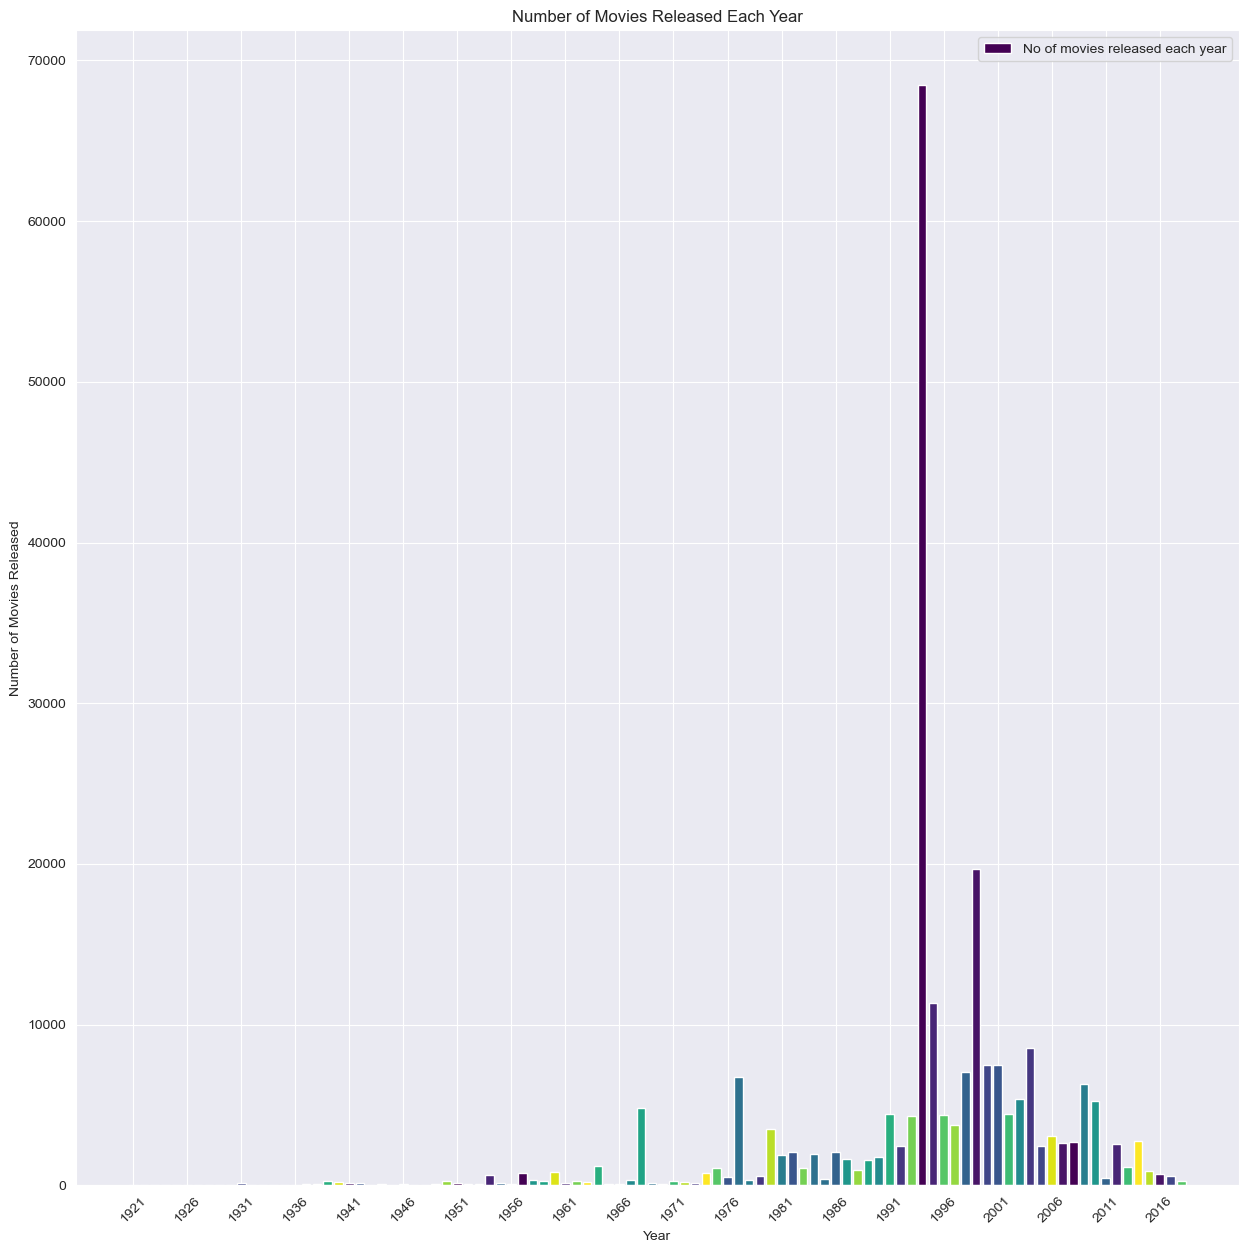

In [30]:
# Sorting the dataframe by years
sorted_df = new_df.sort_values('year_movie_released')

# Showing every 5 years
years_to_display = np.arange(sorted_df['year_movie_released'].min(), sorted_df['year_movie_released'].max() + 1, 5)

# Create a custom color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(years_to_display)))

# Creating the bar plot
plt.figure(figsize=(15, 15))
plt.bar(sorted_df['year_movie_released'].value_counts().index, sorted_df['year_movie_released'].value_counts().values, color=colors, label='No of movies released each year')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released Each Year')
plt.xticks(years_to_display, rotation=45)
plt.legend(loc='best')
plt.show()

**It is interesting to note that even though most movies got released in the `90s` it is the period between `1991` and `1996` that most movies got released.**

#### 4.1.2 Number of movies for each genre released

Next we want to see the number of movies created for each genre. Lets look at the `Genres` column.

In [31]:
new_df['Genres']

0         Adventure|Animation|Children|Comedy|Fantasy
1         Adventure|Animation|Children|Comedy|Fantasy
2         Adventure|Animation|Children|Comedy|Fantasy
3         Adventure|Animation|Children|Comedy|Fantasy
4         Adventure|Animation|Children|Comedy|Fantasy
                             ...                     
233208               Action|Adventure|Children|Sci-Fi
233209                 Action|Animation|Comedy|Sci-Fi
233210                 Action|Animation|Comedy|Sci-Fi
233211                 Action|Animation|Comedy|Sci-Fi
233212                 Action|Animation|Comedy|Sci-Fi
Name: Genres, Length: 233210, dtype: object

**Looking at the way it is, we have to split into specific genres.**

To do this we will have to create new columns so in order as to not affect our new dataframe we have to create a copy

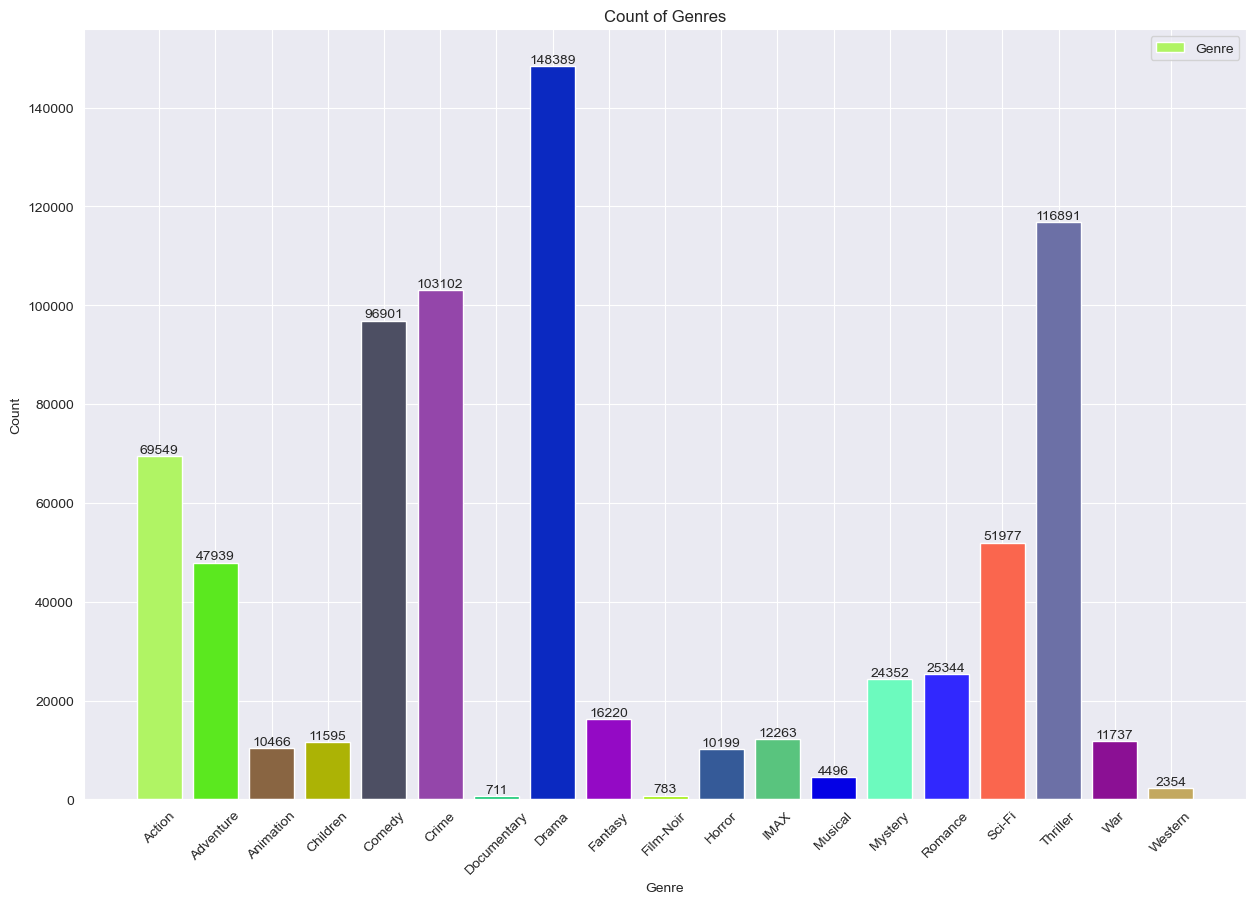

In [32]:
# Creating copy
test_copy = new_df.copy()

# Getting binary variables by splitting '|' then joining to dataframe
genres = test_copy['Genres'].str.get_dummies(sep='|')
test_copy = pd.concat([test_copy, genres], axis=1)

# Creating dictionary to count instances of 1 in the new columns
created_columns = test_copy.columns[15:34]

# Creating dict to count number of instances
instance_dict = {column: 0 for column in created_columns}

# For loop to count the number of times 1 occurs in each binary column
for column in created_columns:
    for value in test_copy[column]:

        if value == 1:
            instance_dict[column] += 1


# Extracting genre names and their counts
genres = list(instance_dict.keys())
counts = list(instance_dict.values())

# Generate a list of random colors (you can customize this as needed)
colors = np.random.rand(len(genres), 3)  # RGB values between 0 and 1

# Creating a bar graph with random colors
plt.figure(figsize=(15, 10))
bars = plt.bar(genres, counts, color=colors)

# Adding labels and title
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Genres')

# Adding legend
plt.legend([bars[0]], ['Genre'], loc='best')

# Adding text labels on top of each bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, count, str(count), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)
plt.show()

**As can be seen above majority of movies released are `Drama` and `Thriller` with `Comedy` and `Crime` following suit.**

#### 4.1.3 What is the distribution of the number of ratings by users?

We want to see how the ratings are distributed this is to get a better understanding of our data.

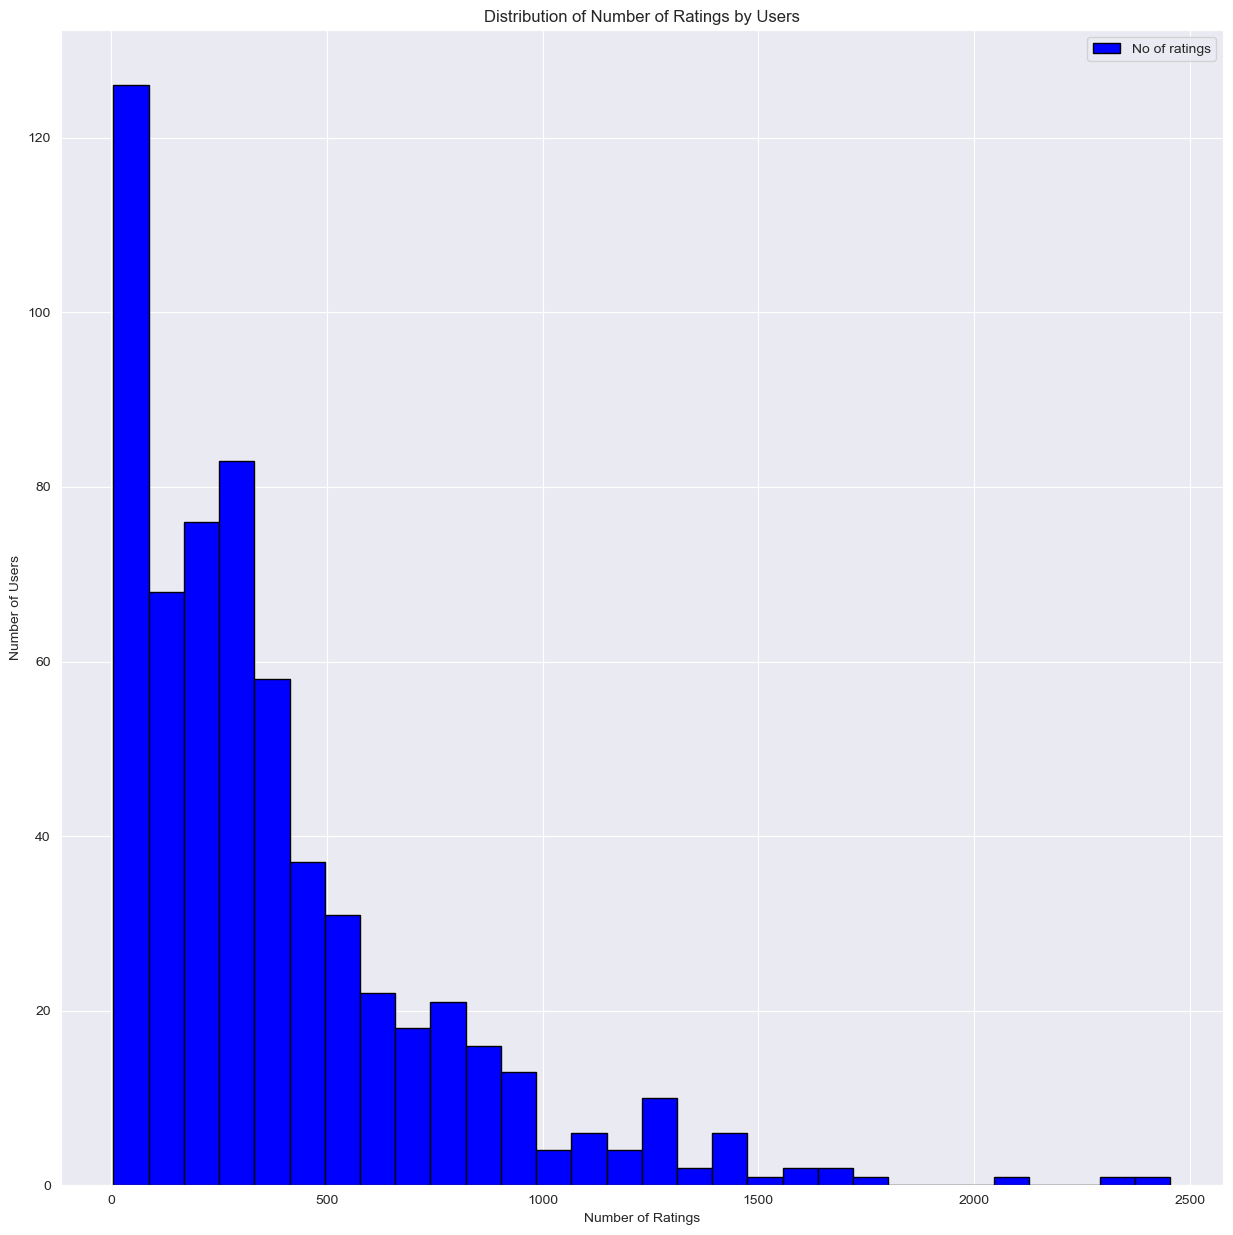

In [33]:
# Grouping the DataFrame by user ID and count the number of ratings for each user
user_rating_counts = new_df['rating_user_id'].value_counts().reset_index()
user_rating_counts.columns = ['User_ID', 'Rating_Count']

# Creating a histogram to visualize the distribution
plt.figure(figsize=(15, 15))
plt.hist(user_rating_counts['Rating_Count'], bins=30, edgecolor='k', label='No of ratings', color='blue')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of Ratings by Users')
plt.grid(True)
plt.legend(loc='best')
plt.show()

**Interesting to note that as the number of ratings increases so does the number of users who have made ratings. This shows that the number of unique ratings is many, meaning there is no bias in the ratings based on one user making many ratings. It is however interesting to see that there are users who made over 2000 ratings of movies.**

#### 4.1.4 Is there a relation between the age of a movie and the chances of it being rated.

We want to understand if there's a relation between the age of the movie and its rating.

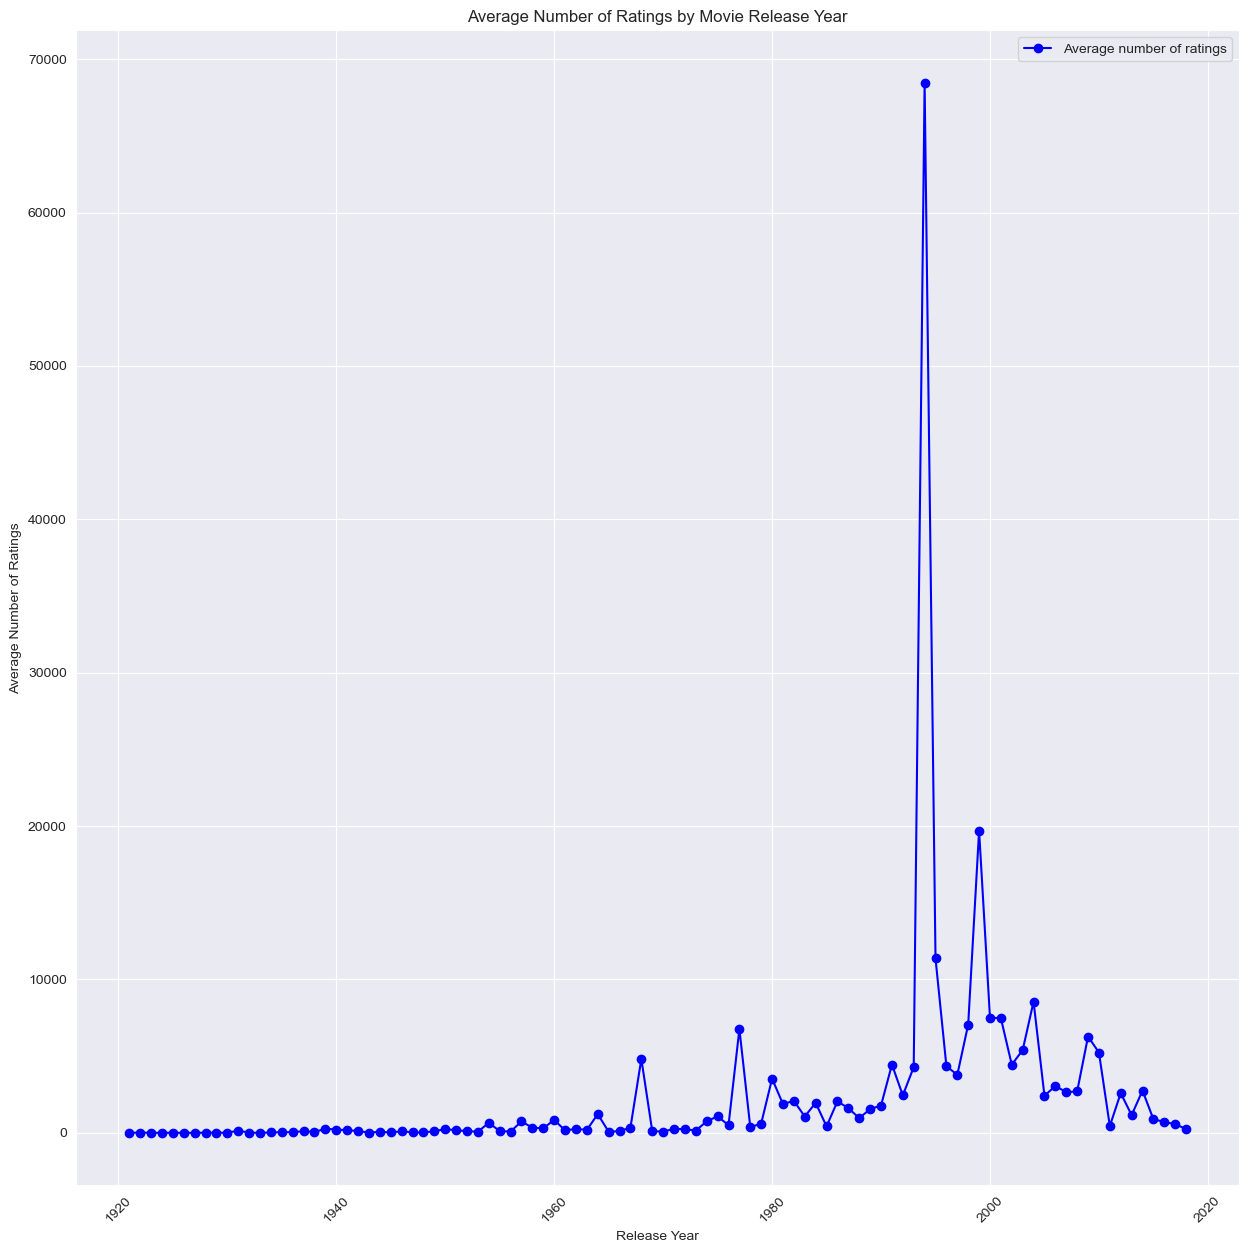

In [34]:
# Calculating the average number of ratings for movies in each release year group
average_ratings_by_year = new_df.groupby('year_movie_released')['Rating'].count().reset_index()
average_ratings_by_year.columns = ['Release_Year', 'Average_Number_of_Ratings']

# Sorting the data by release year
average_ratings_by_year = average_ratings_by_year.sort_values(by='Release_Year')

# Create a line plot to visualize the trend
plt.figure(figsize=(15, 15))
plt.plot(average_ratings_by_year['Release_Year'], average_ratings_by_year['Average_Number_of_Ratings'], marker='o', color='blue', label='Average number of ratings')
plt.xlabel('Release Year')
plt.ylabel('Average Number of Ratings')
plt.title('Average Number of Ratings by Movie Release Year')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

**Here it is interesting to see that as the age of the movie decreases, the chances of it getting high increases up to around the `90s` where there is then a sharp decrease. Movies in the 90s also have a higher number of ratings and this is because as we saw in the first visualisation majority of the movies were in the 90s hence the chances of them getting ratings are significantly higher.**

#### 4.1.5 What is the distribution of ratings in this dataset?

Next we want to see how the ratings are distributed using a histogram to see how the ratings given by users are distributed.

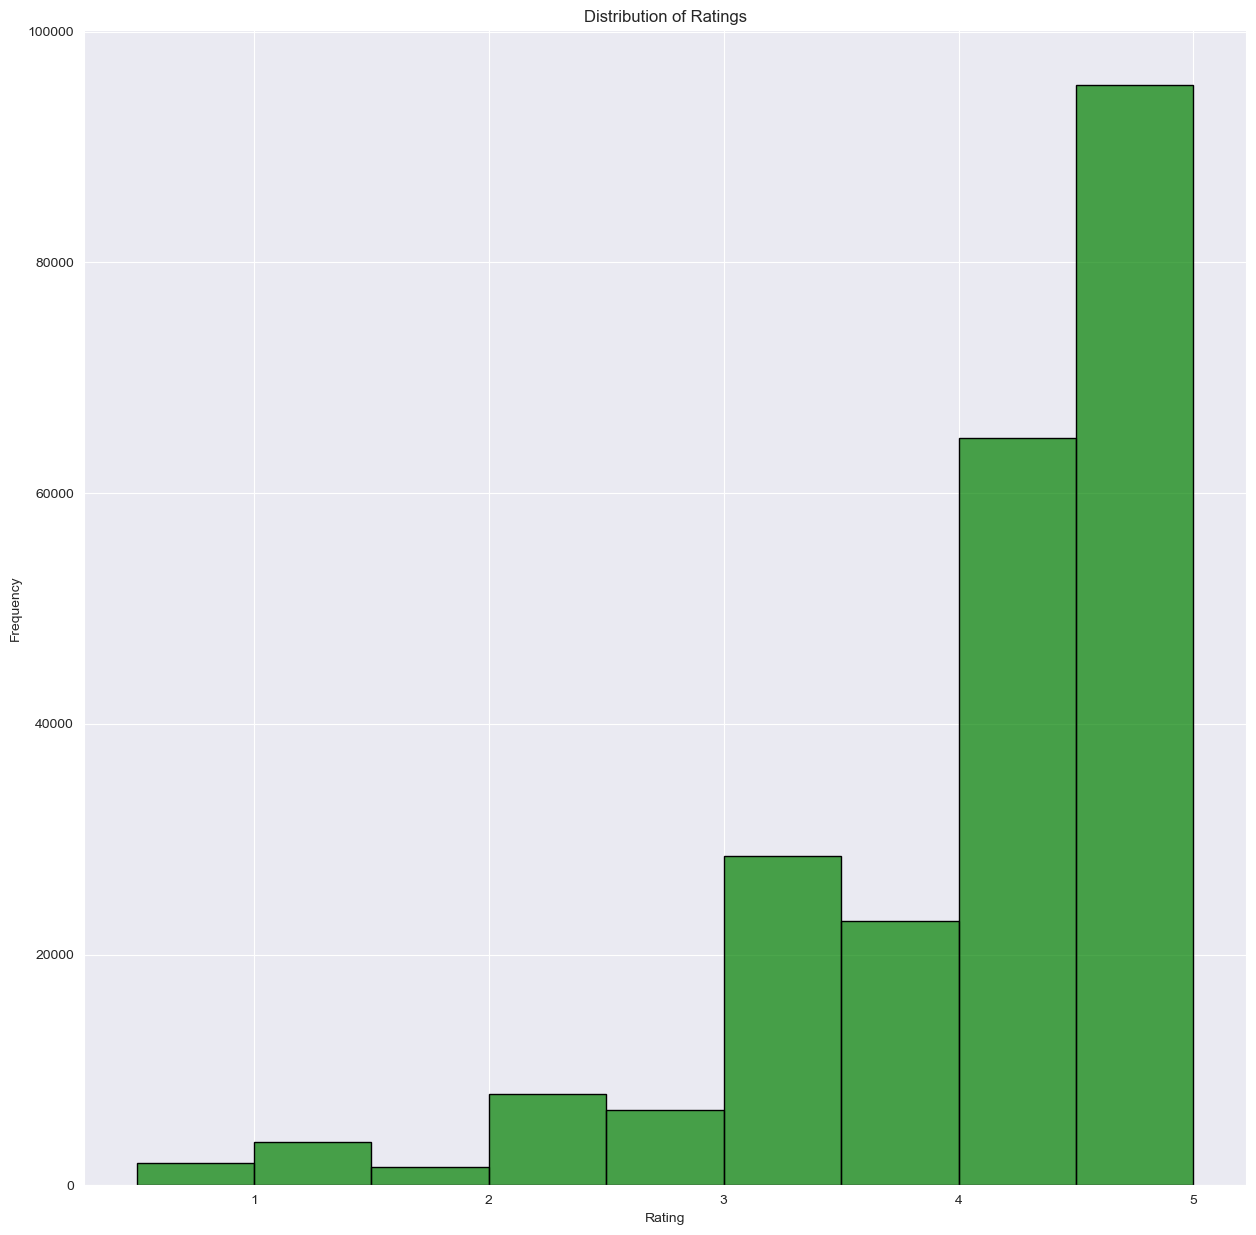

In [35]:
# Creating a histogram to visualize the distribution of ratings
plt.figure(figsize=(15, 15))
sns.histplot(new_df['Rating'], bins=9, edgecolor='k', alpha=0.7, color='green')  # The alpha value is to increase transparency of bars for better visualisation
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.grid(True)
plt.show()

**From this graph we can see that as the rating increases so does the number of people who gave that rating. This may be due to bias where most people are optimists and give good ratings or it may mean that the chances of a movie getting at least a `3` out of 5 is high no matter the quality of the movie in question.**

With this we are done with Univariate analysis and we can move on to Bivariate Analysis.

### 4.2 BIVARIATE ANALYSIS

Here we want to look at the relationship between the features of our dataset to see how they relate to each other. To begin with we will look at our dataframe to remind us of the features present.

In [36]:
# Looking at the first 5 rows just to get a glimpse of our dataset.
new_df.head()

,Movie_Id,Title,year_movie_released,Genres,rating_user_id,Rating,rating_timestamp,rating_year,Movie_age_at_time_of_rating,IMDB_id,TMDB_id,tag_user_id,Tag,tag_timestamp,tag_year
0,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,2000,5,114709,862.0,336,pixar,1139045764,2006
1,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,2000,5,114709,862.0,474,pixar,1137206825,2006
2,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,2000,5,114709,862.0,567,fun,1525286013,2018
3,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1996,1,114709,862.0,336,pixar,1139045764,2006
4,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1996,1,114709,862.0,474,pixar,1137206825,2006


#### 4.2.1 Is there a correlation between the release year of movies and their average ratings?

The first question we can ask is whether there is a correlation between the year a movie was released and its average rating.

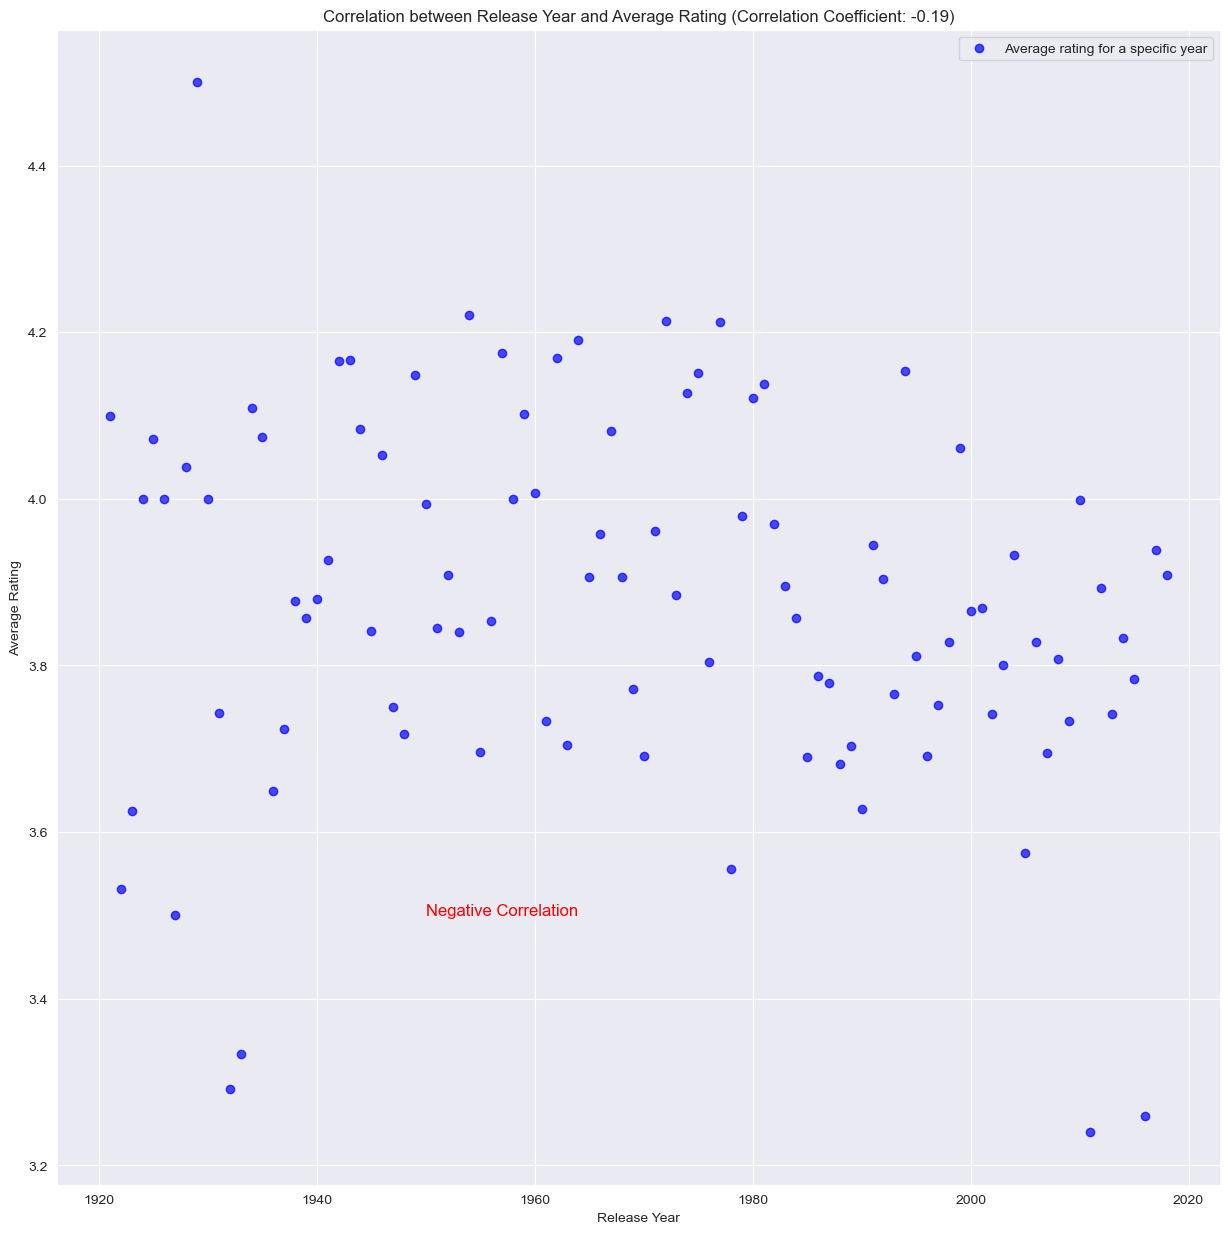

In [38]:
# Calculating the average rating for movies in each release year
average_ratings_by_year = new_df.groupby('year_movie_released')['Rating'].mean().reset_index()

# Calculating the correlation coefficient (Pearson correlation) between release year and average rating
correlation = average_ratings_by_year['year_movie_released'].corr(average_ratings_by_year['Rating'])

# Create a scatterplot to visualize the relationship
plt.figure(figsize=(15, 15))
plt.scatter(average_ratings_by_year['year_movie_released'], average_ratings_by_year['Rating'], alpha=0.7, label='Average rating for a specific year', color='blue')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.title(f'Correlation between Release Year and Average Rating (Correlation Coefficient: {correlation:.2f})')

# Providing additional analysis based on the correlation coefficient
if correlation > 0:
    plt.text(1940, 3.5, 'Positive Correlation', fontsize=12, color='red')
elif correlation < 0:
    plt.text(1950, 3.5, 'Negative Correlation', fontsize=12, color='red')
else:
    plt.text(1950, 3.5, 'Little to No Correlation', fontsize=12, color='red')

plt.grid(True)
plt.legend(loc='best')
plt.show()

**This shows there is little to no correlation between the year a movie was released and the average rating it received. It is however interesting to note that movies released from `2000` have received an a lower average rating compared to the rest. This shows that there was a decline in the quality of movies starting from the year 2000. It is also interesting to note that movies from the year `1940` to `1980` have the highest number of movies with an average rating greater than `4.0` meaning based on user ratings the classics were really good movies.**

#### 4.2.2 How do user ratings differ between different movie genres?

Next we want to see the average rating of users based on the genres to see which kind of movies users like most based on their average ratings or rather which type of films are generally highly rated by users.

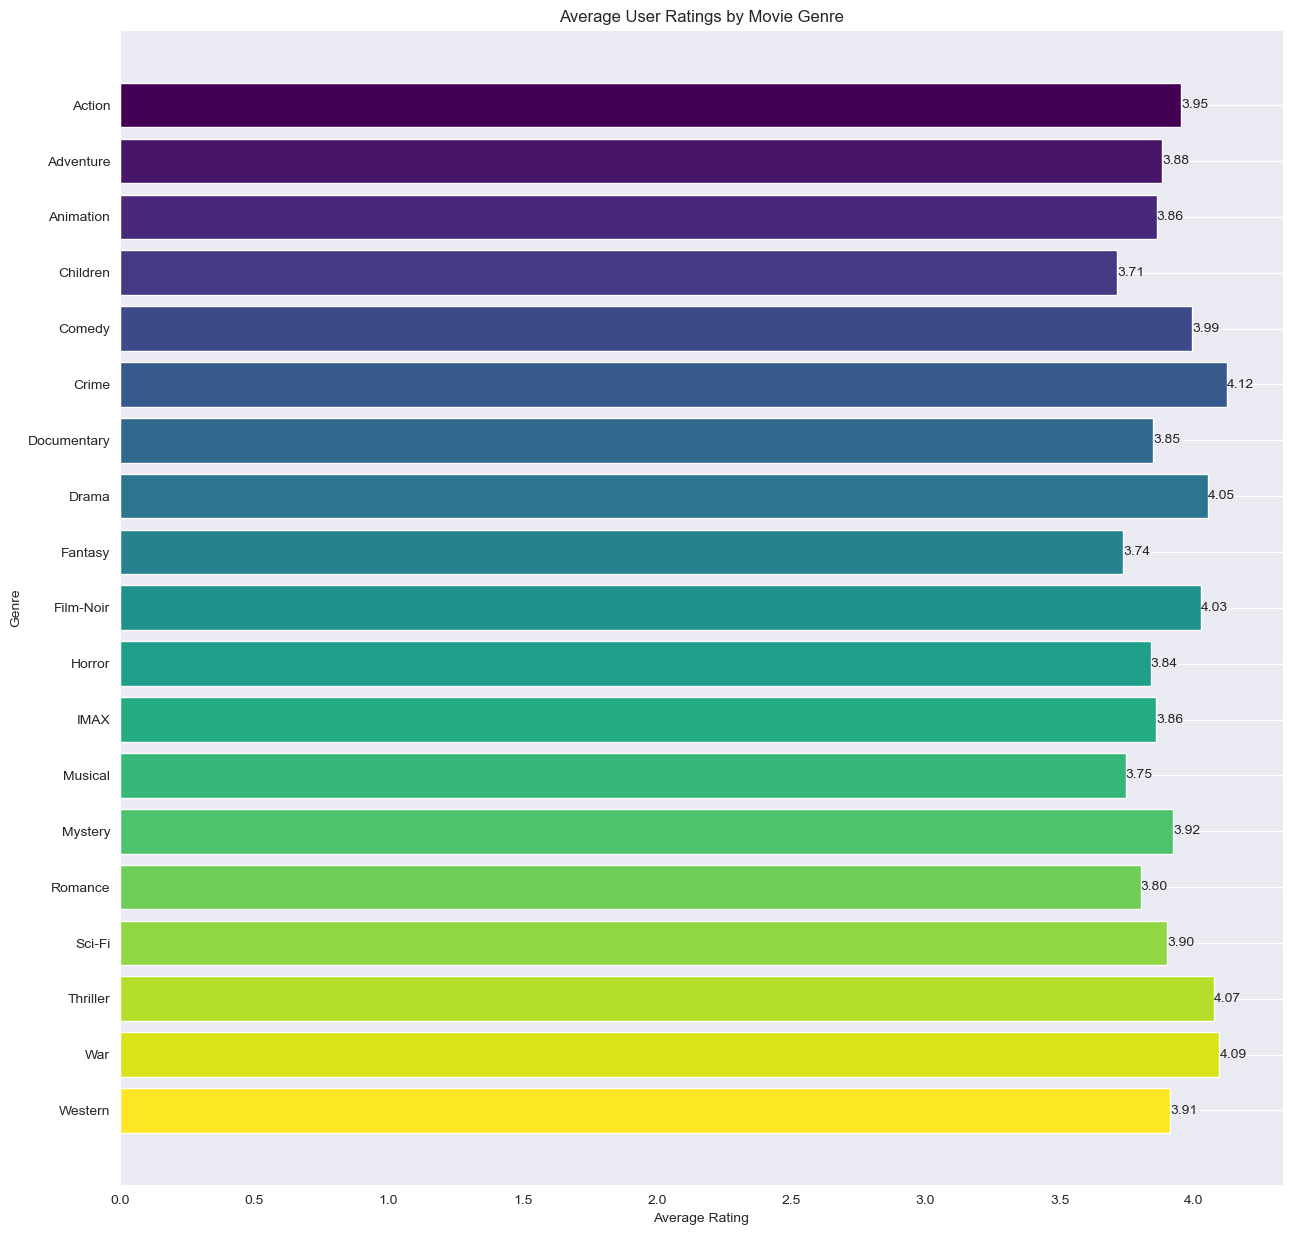

In [38]:
# Splitting the 'Genres' column to extract individual genres
genres_df = new_df['Genres'].str.split('|', expand=True).stack()
genres_df.index = genres_df.index.droplevel(1)

# Calculating the average user rating for each genre
genre_ratings = genres_df.to_frame().join(new_df['Rating']).groupby(0)['Rating'].mean().reset_index()
genre_ratings.columns = ['Genre', 'Average_Rating']

# Defining custom colors for each genre
n_genres = len(genre_ratings)
colors = plt.cm.viridis(np.linspace(0, 1, n_genres))  # You can choose a different colormap

# Visualizing the average user ratings for different genres with custom colors
plt.figure(figsize=(15, 15))
bars = plt.barh(genre_ratings['Genre'], genre_ratings['Average_Rating'], color=colors)
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Average User Ratings by Movie Genre')
plt.gca().invert_yaxis()
plt.grid(axis='x')

# Adding labels with the ratings on top of each bar
for bar in bars:
    rating = bar.get_width()
    plt.text(rating, bar.get_y() + bar.get_height() / 2, f'{rating:.2f}', ha='left', va='center', fontsize=10)

plt.show()

**There seems to be little difference between the average rating of users meaning users are not biased between the type of films they like more over another. This means the ratings users have given are likely due to the quality of the film rather than the type of film it is.**

#### 4.2.3  How have user ratings for a particular genre evolved over the years?

We want to see if the taste of users have changed over time this is just to gain an understanding of our audience.

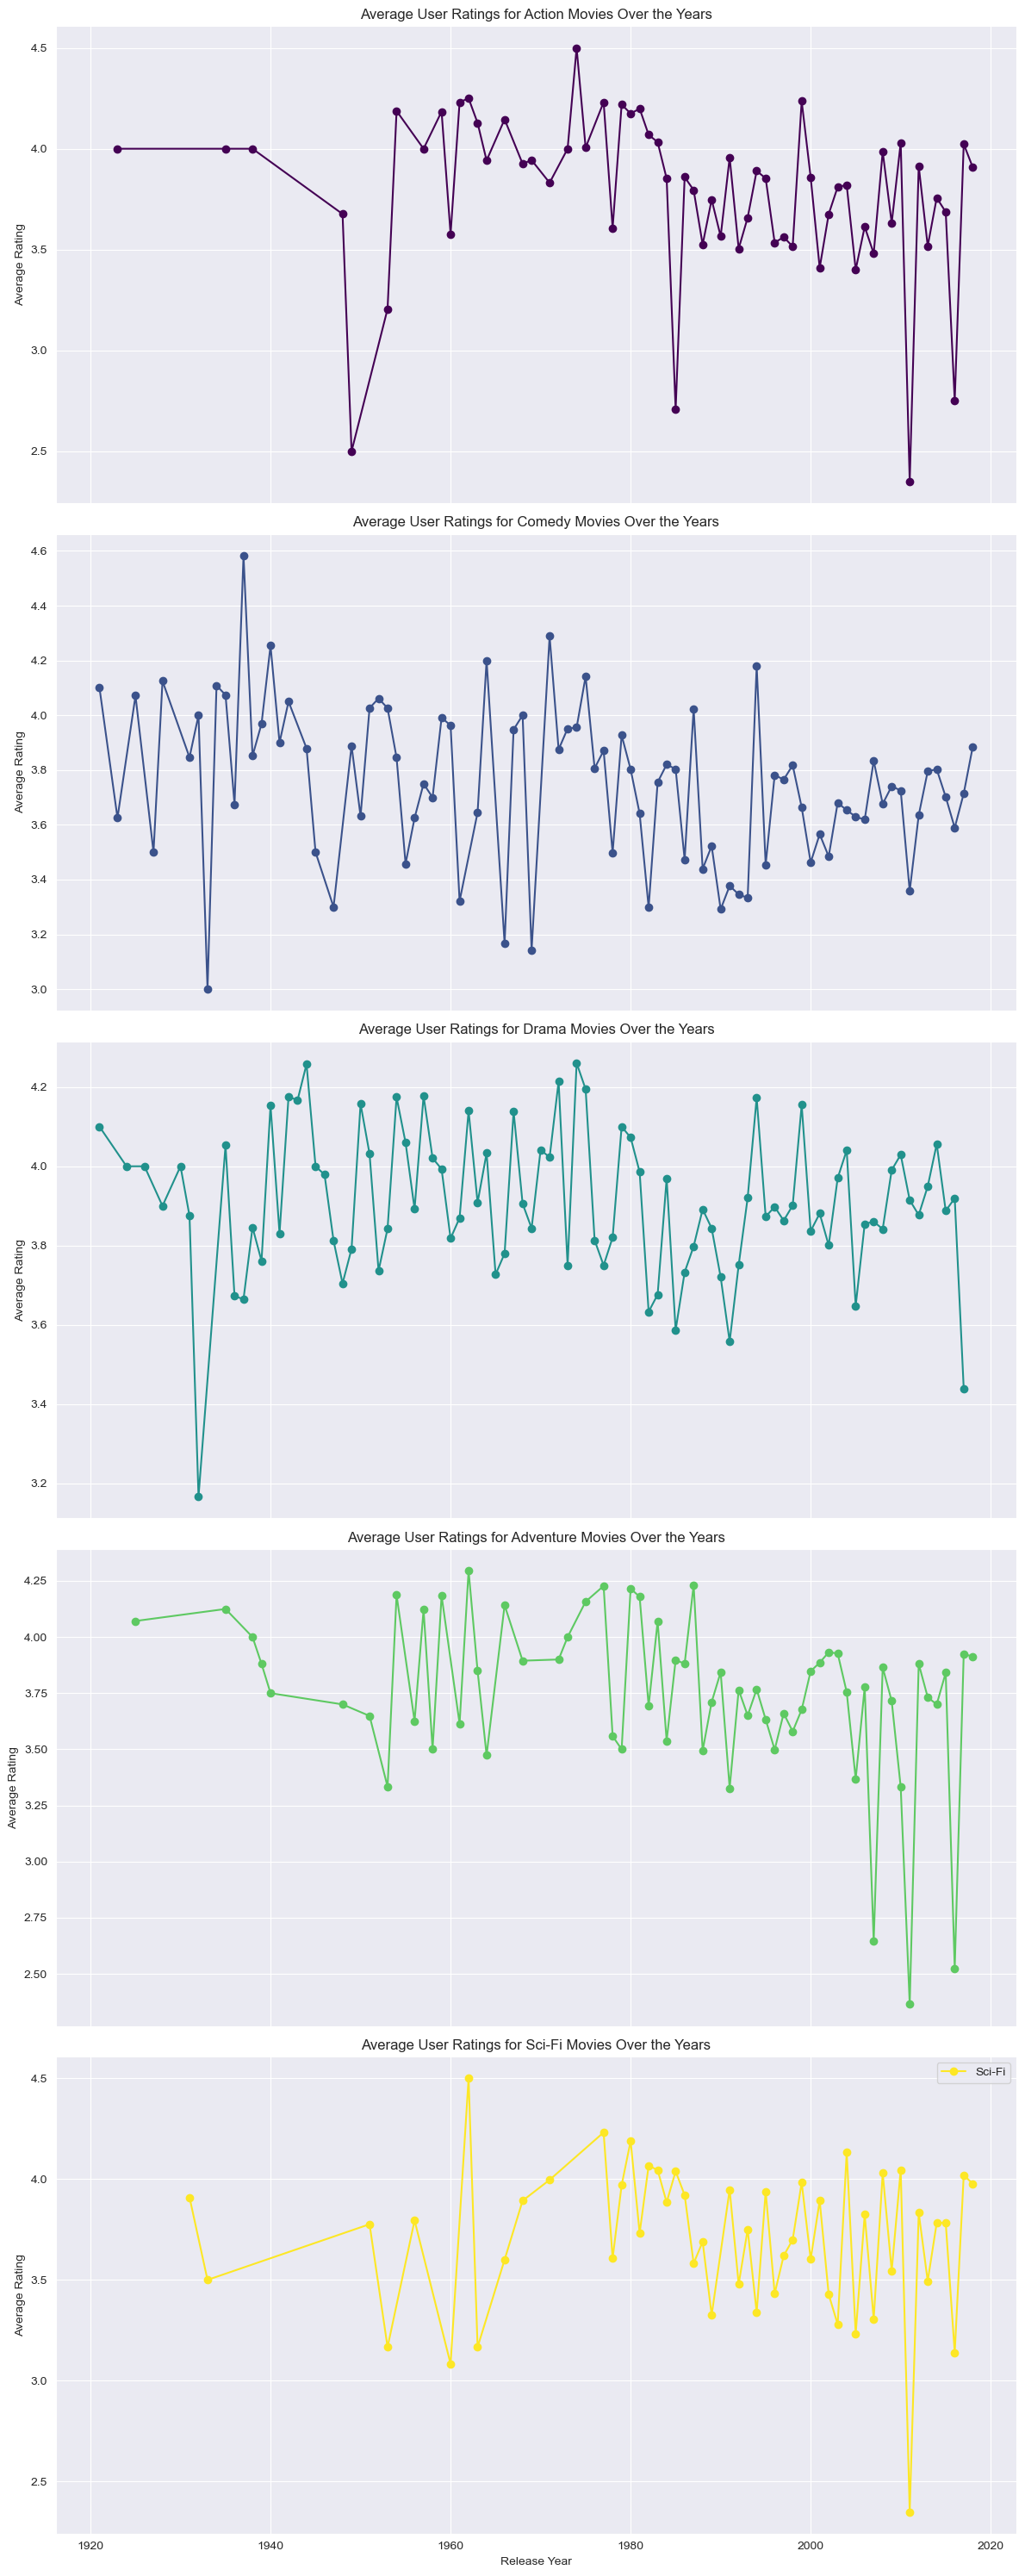

In [39]:

# Let's focus on the most common type of films
genres_of_interest = ['Action', 'Comedy', 'Drama', 'Adventure', 'Sci-Fi']  # Modify as needed

# Creating subplots for each genre
n_genres = len(genres_of_interest)
fig, axes = plt.subplots(n_genres, 1, figsize=(12, 6 * n_genres), sharex=True)

# Defining custom colors for each genre using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, n_genres))

for i, genre in enumerate(genres_of_interest):
    # Filtering the DataFrame for the genre of interest
    genre_filtered_df = new_df[new_df['Genres'].str.contains(genre, case=False, na=False)]
    
    # Grouping by release year and calculate the average user rating for each year
    genre_ratings_by_year = genre_filtered_df.groupby('year_movie_released')['Rating'].mean().reset_index()
    
    # Creating the line plot for the genre in the corresponding subplot
    axes[i].plot(genre_ratings_by_year['year_movie_released'], genre_ratings_by_year['Rating'], marker='o', label=genre, color=colors[i])
    axes[i].set_ylabel('Average Rating')
    axes[i].set_title(f'Average User Ratings for {genre} Movies Over the Years')
    axes[i].grid(True)

# Add a common x-axis label and legend
plt.xlabel('Release Year')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


**Except for a short time of decrease in the early and late years `Action` movies seem to highly related with majority of ratings being over 3.5 and this is the same for `Drama` movies. It is however difficult to predict `Comedy` movies as their average ratings seem to be all over the place. It appears `Sci-Fi` movies are either a hit or a miss but the period between 1980 and 2000 released Sci-Fi movies which were better than average with majority of the scores lying between 3.4 and 4.0. It also appears from the year 2000 the quality of Adventure movies seems to have decreased.**

With this we are finished with Exploratory Data Analysis and we can move on to modelling.

## 5. MODELLING

### 5.1 BASE MODEL

We will use the `surprise` module to build this recommendation system. It is a common library used to build recommendation systems by companies like `Netflix`. This is the first(base) model.

In [40]:
# First we create a reading object
reader = Reader(rating_scale=(1, 5))

# We then load the data into a Surprise Dataset
data = Dataset.load_from_df(new_df[['rating_user_id', 'Movie_Id', 'Rating']], reader)

# Split the data into training and test as usually to train and evaluate
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Initialise the model which in this case is Singular value decomposition
model = SVD1()

# Training the model and getting predictions and RMSE using one function
def fitter_and_evaluator(model):
    
    """
    Trains data using model, makes predictions on testset and calculates its RMSE

    Parmaeters:
    model - Model to train the data on

    Returns:
    RMSE score of model.

    """

    model.fit(trainset)

    # Making predictions
    predictions = model.test(testset)

    # Calculating RMSE
    rmse = accuracy.rmse(predictions)
    print(f'RMSE: {rmse}')

# Testing the function
fitter_and_evaluator(model)


RMSE: 0.3917
RMSE: 0.3916525336675858


**The RMSE of `0.3917` indicates that the ratings predicted are of by 0.3917 units to the actual ratings this is a good starting point for the recommendation system model.**

Now that we have a simple model lets build a function called `get_movie_recommendations` based on the model above that suggests movies based on what a person has seen.

In [41]:
# Function to get movie recommendations based on a given movie title
def get_movie_recommendations(movie_title, model, top_n=5):

    """
    Gives top n movie recommendations based on movie watched.

    Parameters:
    movie_title : The title of the movie which the user has watched
    model : To be able to fit different models to the function to prevent repeating the function when fine tuning or fitting different models
    top_n : No of recommendations to return default value is 5.

    Returns:
    The top n recommendations based on the input of the user.
    
    """
    # This is to prevent an index error if the movie is not in the dataframe
    try:
        # First we get the Movie_Id for the given movie title
        movie_id = new_df[new_df['Title'] == movie_title]['Movie_Id'].iloc[0]

        # We then get a list of user IDs who have rated the given movie
        users_who_watched = new_df[new_df['Movie_Id'] == movie_id]['rating_user_id'].unique()

        # This is a list to store recommendations to give to the user based on what he/she has entered as the movie_title
        recommendations = []

        # Generating recommendations for each user who watched the given movie
        for user_id in users_who_watched:
            
            # Get a list of movie IDs that the user has not rated yet
            unrated_movies = new_df[(new_df['rating_user_id'] == user_id) & (new_df['Movie_Id'] != movie_id)]['Movie_Id'].unique()

            # Predicting ratings for unrated movies
            for unrated_movie_id in unrated_movies:
                predicted_rating = model.predict(user_id, unrated_movie_id).est
                recommendations.append((unrated_movie_id, predicted_rating))

        # Sorting the recommendations by predicted rating in descending order
        recommendations.sort(key=lambda x: x[1], reverse=True)

        # Getting the top N movie recommendations
        top_recommendations = recommendations[:top_n]

        # Printing the top recommendations
        print(f"Top {top_n} movie recommendations based on '{movie_title}':")
        for movie_id, predicted_rating in top_recommendations:
            movie_title = new_df[new_df['Movie_Id'] == movie_id]['Title'].iloc[0]
            print(f'Movie: {movie_title}, Predicted Rating: {predicted_rating}')
    
    # If the movie is not in the dataframe
    except IndexError:
        return "Movie not in dataframe"




Testing the function

In [42]:
# First we check if the try except is working so as to prevent an index error
movie_title = 'Avengers'
get_movie_recommendations(movie_title, model)

'Movie not in dataframe'

In [43]:
# We then check the function by an actual movie in the dataframe
movie_title = 'Jumanji'
get_movie_recommendations(movie_title, model)

Top 5 movie recommendations based on 'Jumanji':
Movie: Star Wars: Episode IV - A New Hope, Predicted Rating: 5
Movie: 2001: A Space Odyssey, Predicted Rating: 5
Movie: Aliens, Predicted Rating: 5
Movie: Harold and Maude, Predicted Rating: 5
Movie: Lost in Translation, Predicted Rating: 5


**We can see the function works well and the model's RMSE is 0.397 which is a very good starting point but let us see if we can improve the score of our model by using surprise's version of GridSearch and a modified version of SVD.**

### 5.2 MODEL 2

Next we want to see if we can fine tune the model using `GridSearch CV` and a modified version of `SVD` to improve our current `RMSE` score.

In [60]:
# Defining the parameter grid for GridSearch CV
param_grid = {'n_factors':[20, 100],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}

# Instatiating GridSearch CV
gs_model = GridSearchCV(SVD2, param_grid=param_grid,n_jobs = -1, joblib_verbose=5)
gs_model.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Now getting the best parameters

In [61]:
gs_model.best_params

{'rmse': {'n_factors': 100, 'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0.4},
 'mae': {'n_factors': 100, 'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0.4}}

Fitting a new model with these parameters and getting RMSE scores

In [65]:
# Instatiating the model using best_params
model2 = SVD2(n_factors=100, n_epochs=10, lr_all=0.002, reg_all=0.4)

# Getting predictions and RMSE using fitter_and_evaluator function described above
fitter_and_evaluator(model2)

RMSE: 0.7941
RMSE: 0.7940869998412708


**The RMSE scores using the advanced version of SVD seem to be getting worse even after tuning let's go back to our original model but not after testing our `get_recommendations` function on our new model.**

In [70]:
# Same movie title as above
movie_title = 'Jumanji'
get_movie_recommendations(movie_title, model2)

Top 5 movie recommendations based on 'Jumanji':
Movie: Shawshank Redemption, The, Predicted Rating: 4.874158742907874
Movie: Shawshank Redemption, The, Predicted Rating: 4.841444048806886
Movie: Shawshank Redemption, The, Predicted Rating: 4.819001941762581
Movie: Pulp Fiction, Predicted Rating: 4.817519573800328
Movie: Seventh Seal, The (Sjunde inseglet, Det), Predicted Rating: 4.798519095297532


**Completely different predictions and movies which are completely different from the popular Jumanji. This shows choosing a different model was a bad idea.**

### 5.3 MODEL 3

We want to try hyperparamer tuning on our original SVD model `SVD1` using GridSearchCV. Since our default parameters are n_factors = 100, n_epochs = 20, lr_all = 0.05 and reg_all = 0.02 we will try not to exceed these parameters and pick parameters lower or equal to these parameters.

In [93]:
# Defining the parameter grid for GridSearch CV
param_grid = {'n_factors':[20, 50, 100],'n_epochs': [5, 10, 20], 'lr_all': np.arange(0.01, 0.1),
              'reg_all': np.arange(0.01, 0.1)}

# Instatiating GridSearch CV
gs_model = GridSearchCV(SVD1, param_grid=param_grid,n_jobs = -1, joblib_verbose=5)
gs_model.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   37.8s finished


Getting best parameters

In [94]:
gs_model.best_params

{'rmse': {'n_factors': 100, 'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.01},
 'mae': {'n_factors': 100, 'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.01}}

Fitting new model with these parameters and seeing RMSE scores

In [96]:
# Instatiating model using best parameters
model3 = SVD1(n_factors=100, n_epochs=20, lr_all=0.01, reg_all=0.01)

# Getting predictions and best RMSE score using this model
fitter_and_evaluator(model3)

RMSE: 0.3466
RMSE: 0.3465840793343428


**An improvement from our original RMSE of 0.39 this is a good sign. Lets make recommendations using this model using the `get_movie_recommendations` function using the same movie_title.**

In [105]:
movie_title = 'Jumanji'
get_movie_recommendations(movie_title, model3)

Top 5 movie recommendations based on 'Jumanji':
Movie: Terminator 2: Judgment Day, Predicted Rating: 5
Movie: Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark), Predicted Rating: 5
Movie: Spirited Away (Sen to Chihiro no kamikakushi), Predicted Rating: 5
Movie: Titanic, Predicted Rating: 5
Movie: Guess Who's Coming to Dinner, Predicted Rating: 5


**3/5 movies fall in the adventure genre and action genre so its not a bad recommendation.**

### 5.4 MODEL 4

So far so good we have our best model so far with an RMSE of `0.3466` which is the difference between the predicted and actual user ratings. Now lets see if we can implement a KNNBasic model which is a form of `User-Based and Item-Based Collaborative Filtering.` This is to see how our model works with different models and the effect these models will have on our RMSE score.

In [109]:
# Initialising KNN Basic algorithm
model4 = KNNBasic(sim_options={'user_based': True})

# Fitting and evaluating base KNN basic model
fitter_and_evaluator(model4)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.5570
RMSE: 0.5570480212393041


**The base KNN model took `18m` to run so it is not efficient for large datasets. This is compared to the other models which took less than `10s` to run. The base model without tuning however returned an RMSE of `0.557` which is promising for a first model compared to the second model which was an advanced SVD model which even after tuning gave an RMSE of `0.794`. Since the base model took 18 mins it reasonable to assume hyperparameter tuning will take `18 * n` minutes to run, where n is the number of parameters to tune, hence we will not use a KNN model due to time constraints.**

### 5.5 MODEL 5

Next we will use `NMF`

In [121]:
# Instatiating model
model5 = NMF()

# Fitting and evaluating model
fitter_and_evaluator(model5)

RMSE: 0.6099
RMSE: 0.6099205809939177


**The RMSE of the base model is not that good compared to other models apart from one as a base model lets try hyperparameter tuning.**

In [44]:
# Parameter grid
param_grid = {
    'n_factors': [5, 10, 20],           # Number of latent factors
    'n_epochs': [50, 100],              # Number of epochs (iterations)
    'biased': [True, False],            # Whether to use bias terms
    'reg_pu': [0.02, 0.1],             # Regularization term for user factors
    'reg_qi': [0.02, 0.1],             # Regularization term for item factors
    'reg_bu': [0.02, 0.1],             # Regularization term for user biases
    'reg_bi': [0.02, 0.1],             # Regularization term for item biases
    'verbose': [True, False],          # Whether to display verbose output
}

# Tuning
# Instatiating GridSearch CV
gs_model = GridSearchCV(NMF, param_grid=param_grid,n_jobs = -1, joblib_verbose=5)
gs_model.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 48.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 62.3min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 68.7min finished


Finding best parameters

In [45]:
gs_model.best_params

{'rmse': {'n_factors': 20,
  'n_epochs': 100,
  'biased': False,
  'reg_pu': 0.1,
  'reg_qi': 0.02,
  'reg_bu': 0.02,
  'reg_bi': 0.1,
  'verbose': False},
 'mae': {'n_factors': 20,
  'n_epochs': 100,
  'biased': False,
  'reg_pu': 0.1,
  'reg_qi': 0.02,
  'reg_bu': 0.02,
  'reg_bi': 0.02,
  'verbose': False}}

Seeing best rmse score for these parameters

In [46]:
gs_model.best_score

{'rmse': 0.5302377797379847, 'mae': 0.34266841692788663}

**Despite the fact that it took over 60 mins to run to get the best parameters the best score is still lower than the original `SVD` algorithm at 0.53 compared to 0.34 hence the model is probably not the best for the data at hand. The long time also indicates that the model does not scale high for large datasets.**

After 5 models with hyperparmater tuning the best model turned out to be our `third` model which was our first model after hyperparameter tuning. This is our best model, which meets the criteria for our measure of success of getting a RMSE of 0.5 as a starting metric which will be tuned over periods of years based on input from users to make it better and better. Now moving on to conclusion.

## 6. CONCLUSION

In this extensive movie recommendation project, we embarked on a journey to design and implement an effective recommendation system that provides personalized movie suggestions to users based on their preferences and historical interactions. Our endeavor began with a thorough **Exploratory Data Analysis (EDA)**, where we meticulously examined the dataset to extract valuable insights. Through the EDA, we gained a deep understanding of the data's nuances, revealing intriguing trends related to **movie genres**, **user ratings**, and the temporal evolution of movie preferences.

One notable finding from our EDA was the discovery of a correlation between the **release year of movies** and their **average ratings**. While users tended to favor movies from the 90s, the decline in average ratings for movies post-2000 suggested a shift in movie quality perception. Furthermore, we explored the distribution of ratings and discerned that users often leaned towards **positive ratings**, hinting at potential user bias.

Having gained a holistic view of our dataset, we embarked on building a recommendation system. Our journey commenced with a **base model** rooted in **Singular Value Decomposition (SVD)**. This initial model performed admirably, yielding a **Root Mean Squared Error (RMSE) of 0.3466** after `hyperparameter tuning`, signifying its ability to predict user ratings with reasonable accuracy. The success of this base model led us to experiment with more sophisticated alternatives, including a **modified SVD variant** and **Non-Negative Matrix Factorization (NMF)**.

While these advanced models presented intriguing possibilities, they did not consistently outperform the baseline SVD model. In particular, NMF, despite a lengthy optimization process, returned a less favorable RMSE of 0.53. This highlighted the importance of selecting an appropriate algorithm that not only meets performance criteria but is also computationally efficient. For instance, the **K-Nearest Neighbors (KNN)** model showed promise but was limited by its computational demands.

In conclusion, this project underscores the critical role of data exploration and algorithm selection in building effective recommendation systems. Our journey from EDA to model experimentation revealed that, for our dataset, the SVD-based model offered the most promising results. However, our work is far from over; continuous improvement driven by user feedback, scalability considerations, and alignment with business objectives will be essential in further enhancing the recommendation system. As we move forward, we remain dedicated to delivering tailored movie recommendations that enhance user satisfaction and engagement.

## 7. RECOMMENDATIONS

- **Continuous User Feedback**: Implement a feedback mechanism that encourages users to rate and provide feedback on movie recommendations. This data can be invaluable for fine-tuning the recommendation algorithms over time.

- **Algorithmic Diversity**: Experiment with a variety of recommendation algorithms, including content-based, collaborative filtering, and hybrid approaches. Continuously monitor their performance and adapt the system to use the most effective algorithm for different user segments or scenarios.

- **Scalability and Efficiency**: Consider the scalability of the recommendation system, especially when dealing with large datasets. Explore algorithms and techniques that can handle growing user bases and movie catalogs efficiently.

- **Personalization and Diversity**: Enhance the personalization aspect of the recommendations by incorporating user profiles, historical behavior, and demographic information. Additionally, ensure that the system recommends a diverse set of movies to cater to different user tastes.

- **A/B Testing**: Conduct A/B tests to evaluate the impact of recommendation changes on user engagement and satisfaction. This will help in making data-driven decisions about algorithm adjustments and feature enhancements.

- **Data Quality and Cleansing**: Continuously monitor and clean the data to ensure data quality. Address issues like duplicate entries, missing values, and outliers to prevent them from affecting recommendation accuracy.

- **Privacy and Security**: Implement robust privacy controls to protect user data and adhere to data privacy regulations. Ensure that user profiles and preferences are handled securely.

- **Mobile and Platform Integration**: Extend the recommendation system to various platforms, including mobile apps, smart TVs, and web applications, to maximize user reach and convenience.

- **User Education and Onboarding**: Provide onboarding guidance to users, helping them understand how the recommendation system works and how to make the most of it. Educate them on the benefits of rating and providing feedback.

- **Regular Model Reevaluation**: Periodically revisit and reevaluate the recommendation models. As user preferences evolve, update the models and algorithms to maintain relevance and accuracy.

These recommendations, when implemented, will contribute to the ongoing success and effectiveness of the movie recommendation system, ensuring that it continues to provide valuable and personalized movie suggestions to users.